In [1]:
import sys
sys.path.append('/Users/lls/Documents/mlhalos_code/')
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from mlhalos import parameters
from mlhalos import plot
from mlhalos import machinelearning as ml
from sklearn.ensemble import RandomForestClassifier

%matplotlib

Using matplotlib backend: agg


In [2]:
training_index = np.load("/Users/lls/Documents/CODE/stored_files/all_out/50k_features_index.npy")
testing_index = np.random.choice(range(256**3), 20000)
testing_index = testing_index[~np.in1d(testing_index, training_index)]

## Density-only classification

Train the random forest using the density features

In [3]:
den_features = np.load("/Users/lls/Documents/CODE/stored_files/shear/shear_quantities/features/density_features.npy")

In [4]:
Xden = den_features[training_index,:-1]
y = den_features[training_index, -1]
den_test = den_features[testing_index, :-1]
y_test = den_features[testing_index, -1]

clf = RandomForestClassifier(n_estimators=1300, min_samples_leaf=15, min_samples_split=2, 
                             n_jobs=3, criterion='entropy', max_features=0.4)
clf.fit(Xden, y)

y_predicted = clf.predict_proba(den_test)
fpr_den, tpr_den, auc_den, threshold = ml.roc(y_predicted, y_test)
imp_den = clf.feature_importances_
clf_den = clf

print("The AUC of the density-only run is " + str(auc_den))

The AUC of the density-only run is 0.875582079074


In [122]:
joblib.dump(clf_den,
            "/Users/lls/Documents/CODE/stored_files/shear/saved_classifiers/den/clf.pkl", compress=3 )

['/Users/lls/Documents/CODE/stored_files/shear/saved_classifiers/den/clf.pkl']

## Ellipticity-only classification

Train the random forest using the ellipticity features

In [5]:
ell_features = np.load("/Users/lls/Documents/CODE/stored_files/shear/shear_quantities/features/ellipticity_features.npy")

In [6]:
Xell = ell_features[training_index,:-1]
assert (y == ell_features[training_index, -1]).all()
ell_test = ell_features[testing_index, :-1]
assert (y_test == ell_features[testing_index, -1]).all()

clf = RandomForestClassifier(n_estimators=1300, min_samples_leaf=15, min_samples_split=2, 
                             n_jobs=3, criterion='entropy', max_features=0.4)
clf.fit(Xell, y)

y_predicted = clf.predict_proba(ell_test)
fpr_ell, tpr_ell, auc_ell, threshold = ml.roc(y_predicted, y_test)
imp_ell = clf.feature_importances_
clf_ell= clf

print("The AUC of the ellipticity-only run is " + str(auc_ell))

The AUC of the ellipticity-only run is 0.873565700796


In [123]:
joblib.dump(clf_ell,
            "/Users/lls/Documents/CODE/stored_files/shear/saved_classifiers/ell/clf.pkl", compress=3 )

['/Users/lls/Documents/CODE/stored_files/shear/saved_classifiers/ell/clf.pkl']

## Density-subtracted ellipticity only classification

In [7]:
den_sub_ell = np.load("/Users/lls/Documents/CODE/stored_files/shear/shear_quantities/features/den_sub_ellipticity_features.npy")

In [8]:
Xden_sub_ell = den_sub_ell[training_index,:-1]
y = den_sub_ell[training_index, -1]
assert (y == den_features[training_index, -1]).all()
# den_sub_ell_test = den_sub_ell[testing_index, :-1]
assert (y_test == den_features[testing_index, -1]).all()
# y_test = den_sub_ell[testing_index, -1]

clf = RandomForestClassifier(n_estimators=1300, min_samples_leaf=15, min_samples_split=2, 
                             n_jobs=3, criterion='entropy', max_features=0.4)
clf.fit(Xden_sub_ell, y)

y_predicted = clf.predict_proba(den_sub_ell_test)
# np.save("/Users/lls/Documents/CODE/stored_files/shear/classification/y_predicted_den_sub_ell_only.npy", y_predicted)
# np.save("/Users/lls/Documents/CODE/stored_files/shear/classification/y_true_den_sub_ell_only.npy", y_test)
fpr_den_sub_ell, tpr_den_sub_ell, auc_den_sub_ell, threshold = ml.roc(y_predicted, y_test)
imp_den_sub_ell = clf.feature_importances_
clf_den_sub_ell = clf

print("The AUC of the density-subtracted ellipticity run is " + str(auc_den_sub_ell))

The AUC of the density-subtracted ellipticity run is 0.635707009588


## Density + density-subtracted ellipticity 

In [9]:
X = np.column_stack((Xden, Xden_sub_ell))
X_test = np.column_stack((den_test, den_sub_ell_test))
assert X.shape[1] == 100
assert X_test.shape[1] == 100

clf = RandomForestClassifier(n_estimators=1300, min_samples_leaf=15, min_samples_split=2, 
                             n_jobs=3, criterion='entropy', max_features=0.4)
clf.fit(X, y)

y_predicted = clf.predict_proba(X_test)
fpr_den_plus_den_sub_ell, tpr_den_plus_den_sub_ell, auc_den_plus_den_sub_ell, threshold = ml.roc(y_predicted, y_test)
imp_den_plus_den_sub_ell = clf.feature_importances_
clf_den_plus_den_sub_ell = clf

print("The AUC of the density + density-subtracted ellipticity run is " + str(auc_den_plus_den_sub_ell))

The AUC of the density + density-subtracted ellipticity run is 0.892258452386


In [121]:
from sklearn.externals import joblib
joblib.dump(clf_den_plus_den_sub_ell,
            "/Users/lls/Documents/CODE/stored_files/shear/saved_classifiers/den+den_sub_ell/clf.pkl", compress=3 )

['/Users/lls/Documents/CODE/stored_files/shear/saved_classifiers/den+den_sub_ell/clf.pkl']

## Density + ellipticity 

In [10]:
X = np.column_stack((Xden, Xell))
X_test = np.column_stack((den_test, ell_test))
assert X.shape[1] == 100
assert X_test.shape[1] == 100

clf = RandomForestClassifier(n_estimators=1300, min_samples_leaf=15, min_samples_split=2, 
                             n_jobs=3, criterion='entropy', max_features=0.4)
clf.fit(X, y)

y_predicted = clf.predict_proba(X_test)
fpr_den_ell, tpr_den_ell, auc_den_ell, threshold = ml.roc(y_predicted, y_test)
imp_den_ell = clf.feature_importances_
clf_den_ell = clf

print("The AUC of the density + ellipticity run is " + str(auc_den_ell))

The AUC of the density + ellipticity run is 0.886147825586


In [126]:
joblib.dump(clf_den_ell,
            "/Users/lls/Documents/CODE/stored_files/shear/saved_classifiers/den+ell/clf.pkl", compress=3 )

['/Users/lls/Documents/CODE/stored_files/shear/saved_classifiers/den+ell/clf.pkl']

## Raw Eigenvalues

In [11]:
eig_features = np.load("/Users/lls/Documents/CODE/stored_files/shear/shear_quantities/features/eigenvalues_features.npy")

In [12]:
Xeig = eig_features[training_index, :-1]
assert (y == eig_features[training_index, -1]).all()
eig_test = eig_features[testing_index, :-1]
assert (y_test == eig_features[testing_index, -1]).all()

clf = RandomForestClassifier(n_estimators=1300, min_samples_leaf=15, min_samples_split=2, 
                             n_jobs=3, criterion='entropy', max_features=0.4)
clf.fit(Xeig, y)

y_predicted = clf.predict_proba(eig_test)
fpr_eig, tpr_eig, auc_eig, threshold = ml.roc(y_predicted, y_test)
imp_eig = clf.feature_importances_
clf_eig = clf

print("The AUC of the eigenvalues run is " + str(auc_eig))

The AUC of the eigenvalues run is 0.89948667171


In [127]:
joblib.dump(clf_eig,
            "/Users/lls/Documents/CODE/stored_files/shear/saved_classifiers/eig/clf.pkl", compress=3 )

['/Users/lls/Documents/CODE/stored_files/shear/saved_classifiers/eig/clf.pkl']

## Final ROC curves

/Users/lls/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


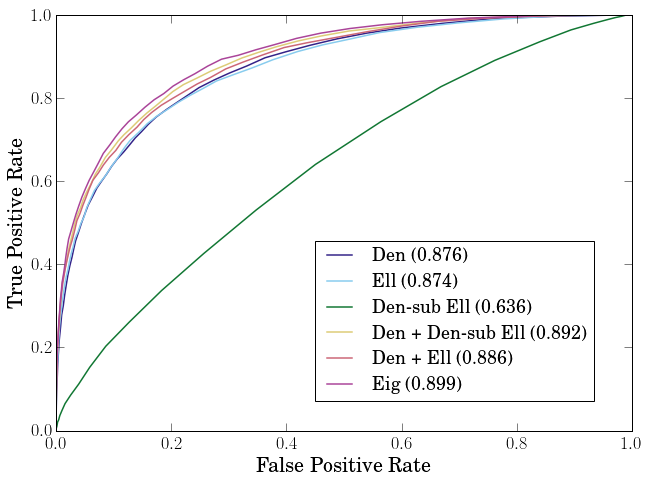

In [28]:
FPR = np.column_stack((fpr_den, fpr_ell, fpr_den_sub_ell, fpr_den_plus_den_sub_ell, fpr_den_ell, fpr_eig))
TPR = np.column_stack((tpr_den, tpr_ell, tpr_den_sub_ell, tpr_den_plus_den_sub_ell, tpr_den_ell, tpr_eig))
AUC = [auc_den, auc_ell, auc_den_sub_ell, auc_den_plus_den_sub_ell, auc_den_ell, auc_eig]

fig = plot.roc_plot(FPR, TPR, AUC, figsize=(10, 7), labels=['Den', 'Ell', ' Den-sub Ell' , 'Den + Den-sub Ell', 
                                                            'Den + Ell', 'Eig'])
plt.savefig("/Users/lls/Documents/CODE/stored_files/shear/classification/rocs.pdf")

In [120]:
fpr_eig

array([  0.00000000e+00,   2.19122051e-04,   8.76488204e-04,
         1.46081367e-03,   2.26426119e-03,   3.79811555e-03,
         4.82068512e-03,   6.35453948e-03,   7.52319042e-03,
         9.13008546e-03,   1.02987364e-02,   1.30742824e-02,
         1.49733402e-02,   1.66532759e-02,   1.90636184e-02,
         2.17661237e-02,   2.61485648e-02,   3.05310058e-02,
         3.45482434e-02,   3.92228471e-02,   4.47739391e-02,
         5.10554379e-02,   5.74830180e-02,   6.55905339e-02,
         7.39171719e-02,   8.19516471e-02,   9.29807903e-02,
         1.03133445e-01,   1.14381711e-01,   1.25629976e-01,
         1.39288584e-01,   1.54188883e-01,   1.70257834e-01,
         1.86984150e-01,   2.03053101e-01,   2.21751516e-01,
         2.41326419e-01,   2.63019502e-01,   2.87195968e-01,
         3.16339201e-01,   3.46651085e-01,   3.80103718e-01,
         4.17427507e-01,   4.59571982e-01,   5.09677891e-01,
         5.66284420e-01,   6.33993134e-01,   7.15798700e-01,
         8.33248119e-01,

# Feature Importances

In [101]:
# import importlib
# importlib.reload(plot)
from mlhalos import distinct_colours

colors= distinct_colours.get_distinct(8)

IMP = [imp_den, imp_ell, imp_den_sub_ell, imp_den_plus_den_sub_ell, imp_den_ell, imp_eig]
LABELS = ['Density', 'Ellipticity', ' Den-sub ellipticity' , 'Density + Den-sub ellipticity', 
                 'Density + Ellipticity', 'Eigenvalues']

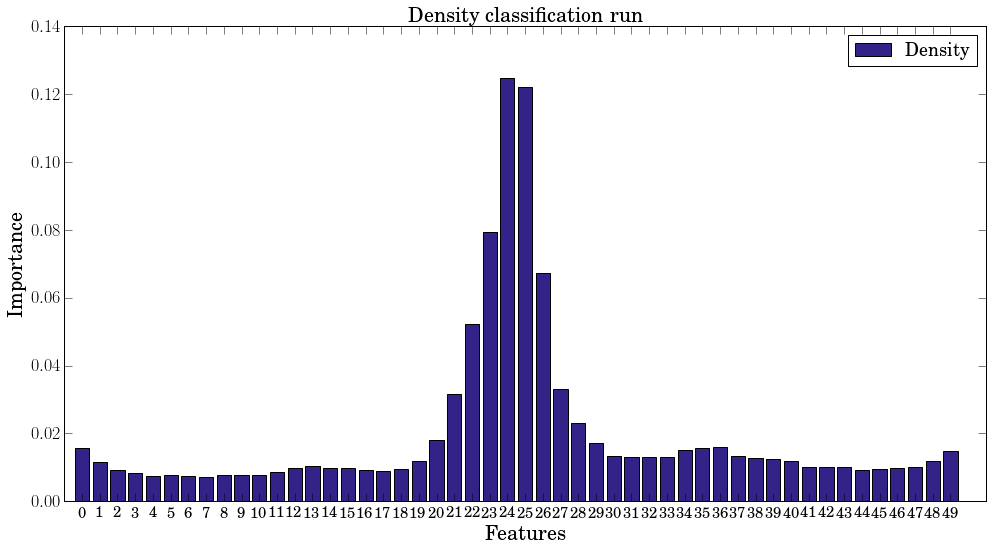

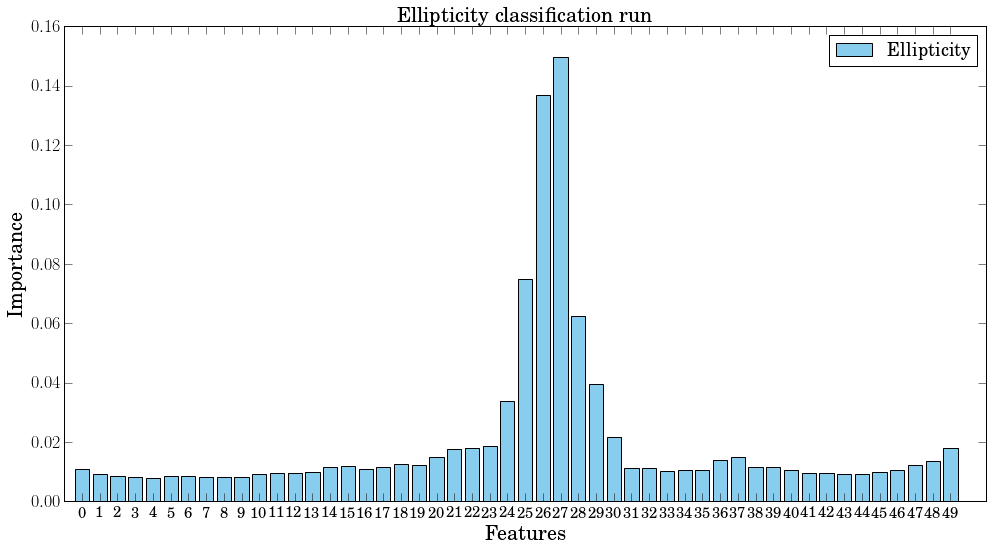

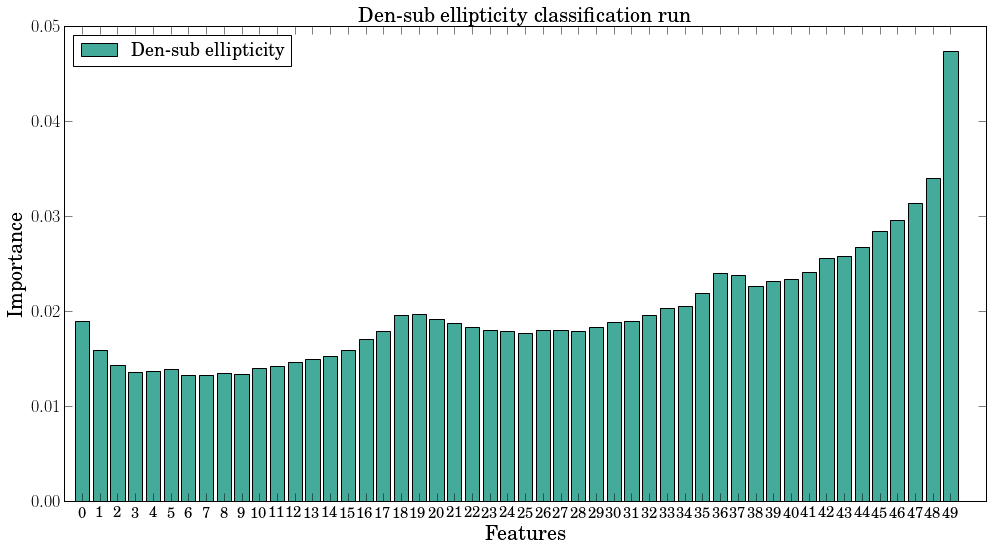

In [105]:
for i in [0,1,2]:
    plot.plot_importances_vs_scale_number(IMP[i], color=colors[i], label=LABELS[i])
    plt.title(str(LABELS[i]) + " classification run")
    plt.savefig("/Users/lls/Documents/CODE/stored_files/shear/classification/" + str(LABELS[i]) + "_importance.pdf")

In [118]:
importlib.reload(plot)

<module 'mlhalos.plot' from '/Users/lls/Documents/mlhalos_code/mlhalos/plot.py'>

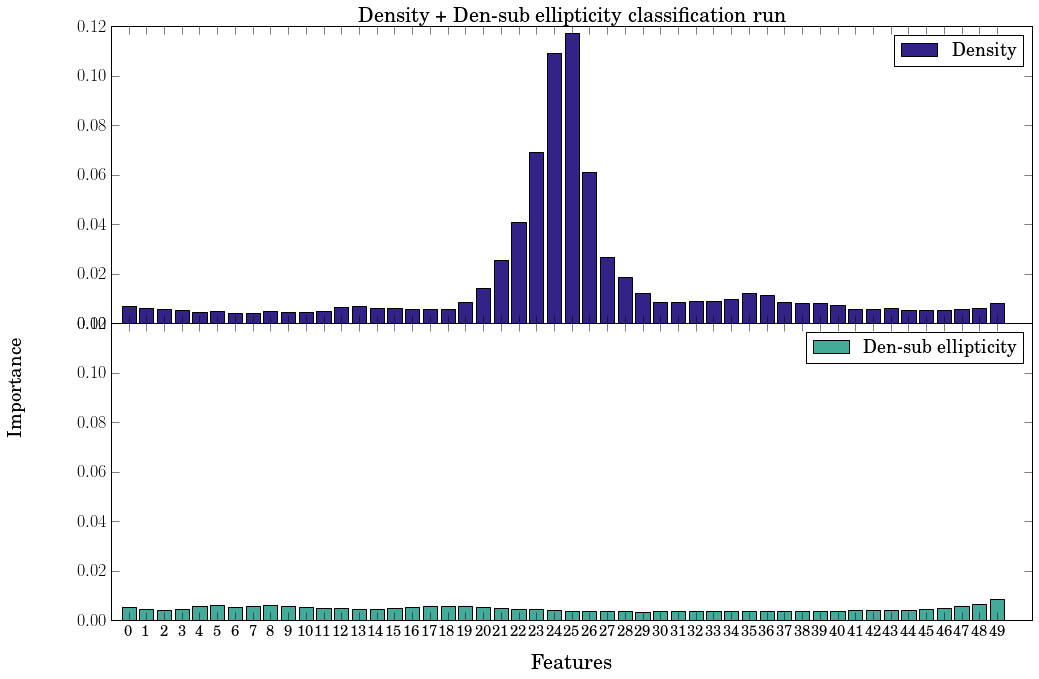

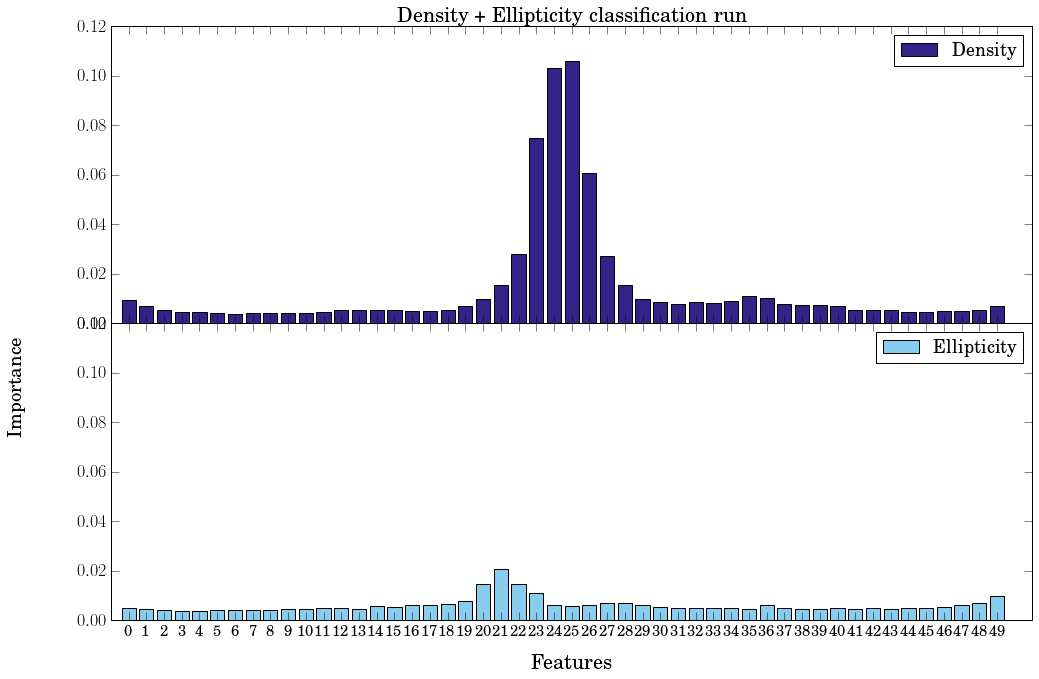

In [112]:
for i in range(3,5):
    a = 0
    if i==3:
        b=2
    else:
        b=1
    plot.plot_importances_vs_scale_number(IMP[i], subplots=2, color=[colors[a], colors[b]], label=[LABELS[a], LABELS[b]])
    plt.savefig("/Users/lls/Documents/CODE/stored_files/shear/classification/" + str(LABELS[a])
                +"_"+ str(LABELS[b])+ "_importance.pdf")

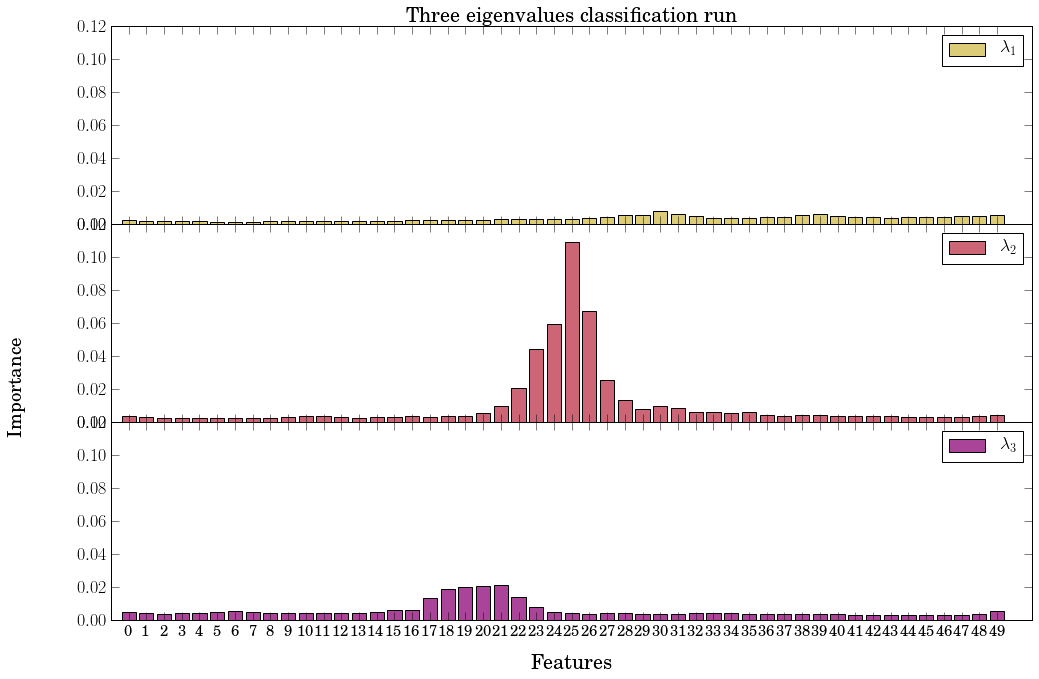

In [119]:
# In the case of the eigenvalues, the features are ordered s.t. $[\lambda_0, \lambda_1, \lambda_2]*50$.

imp_reordered = np.zeros(imp_eig.shape)
for i in range(50):
    imp_reordered[i] = imp_eig[i*3]
    imp_reordered[i+50] = imp_eig[(i*3) + 1]
    imp_reordered[i+100] = imp_eig[(i*3) + 2]

plot.plot_importances_vs_scale_number(imp_reordered, subplots=3, color=[colors[5], colors[6], colors[7]],
                                      label=[r"$\lambda_1$", r"$\lambda_2$",r"$\lambda_3$"], 
                                      title="Three eigenvalues classification run")

Yes, the reordering recovers the eigenvalues in the correct order


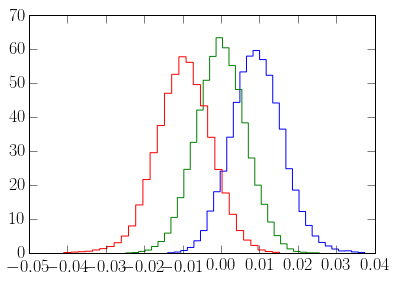

In [98]:
# Check that indeed by reordering in that way you do get the right features lambda_1, lambda_2, lambda_3

Xeig_reordered = np.zeros(Xeig.shape)
for i in range(50):
    Xeig_reordered[:,i] = Xeig[:,i*3]
    Xeig_reordered[:,i+50] = Xeig[:,(i*3) + 1]
    Xeig_reordered[:,i+100] = Xeig[:,(i*3) + 2]

plt.hist(Xeig_reordered[:,30], bins=30, normed=True,histtype="step", color="b")
plt.hist(Xeig_reordered[:, 80], bins=30, normed=True,histtype="step", color="g")
plt.hist(Xeig_reordered[:, 130], bins=30, normed=True,histtype="step", color="r")

print("Yes, the reordering recovers the eigenvalues in the correct order")

In [86]:
# Would also be good to run this 10 times to get a sense of the errorbars. Seems strange that $\lambda_2$ 
# is the most relevant out of the three eigenvalues --> on hypatia